In [1]:
import json

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import math

In [65]:
train_data = []
with open('/kaggle/input/preprocessed-real/corpus_preprocessed.json', 'r') as f:
    train_data = json.load(f)

test_data = []
with open('/kaggle/input/preprocessed-real/test_corpus_preprocessed.json', 'r') as f:
    test_data = json.load(f)

#make df
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)


In [15]:
train_df[:65000]

,text,label
0,dr goldberg offer everything look general prac...,4
1,unfortunately frustration dr goldberg patient ...,1
2,going dr goldberg year think one Stop That pat...,3
3,got letter mail last week said dr goldberg mov...,3
4,know dr goldberg like moving arizona but let t...,0
...,...,...
64995,place really good,4
64996,fine guess came hour closing particularly soft...,2
64997,said million time but vegan dont and they good...,4
64998,probably best apple ritter ever hand and and p...,4


In [16]:
x = train_df[:65000]['text']
y = train_df[:65000]['label']
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -86.97
RMSE: 13.41


In [19]:
#Create a dataframe containing attributes with actual words via .get_feature_names() method,
#with their corresponding coefficient values
df_features = pd.DataFrame(data = {'Coefficient':list(regr.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
#create coefficient magnitude column and sort the dataframe by this column
#followed by getting the top 10 coefficients
df_features['Coefficient_Magnitude'] = abs(df_features['Coefficient'])
df_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
45193,26.764586,tammie coe,26.764586
10717,-23.622950,dac,23.622950
20933,-22.304135,heirloom tomato,22.304135
20932,20.752112,heirloom,20.752112
45192,-20.358046,tammie,20.358046
33492,19.593876,payment and,19.593876
33973,18.920227,pho dac,18.920227
3995,-18.658192,barnes noble,18.658192
10823,18.348454,daughter wanted,18.348454
49461,-18.082241,waiter gave,18.082241


In [3]:
from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

import pandas as pd
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [25]:
x = train_df[:65000]['text']
y = train_df[:65000]['label']
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -4.76
RMSE: 3.43


In [28]:
#Create a dataframe containing attributes with actual words via .get_feature_names() method,
#with their corresponding coefficient values
df_features = pd.DataFrame(data = {'Coefficient':list(regr.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
#create coefficient magnitude column and sort the dataframe by this column
#followed by getting the top 10 coefficients
df_features['Coefficient_Magnitude'] = abs(df_features['Coefficient'])
df_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
59793,4.942655,service terrible,4.942655
37576,3.433772,life has,3.433772
64832,3.049920,surprised the,3.049920
59715,3.024919,service horrible,3.024919
64395,-2.873843,subs and,2.873843
22650,-2.767547,fabulous but,2.767547
41997,2.722037,motorcycles,2.722037
71579,2.712590,this wal,2.712590
72263,2.702900,timing,2.702900
57303,-2.476710,rock music,2.476710


In [35]:
x = train_df[:65000]['text']
y = train_df[:65000]['label']

In [23]:
x[1]

"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."

**Problems like sentiment analysis are much more sensitive to stop words removal than document classification.**

"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars."

In [36]:
new_x = []
for i, text in enumerate(x):
    new_text = text.lower().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ')
    new_x.append(new_text)
x = new_x

In [6]:
x[1]

"unfortunately, the frustration of being dr. goldberg's patient is a repeat of the experience i've had with so many other doctors in nyc -- good doctor, terrible staff.  it seems that his staff simply never answers the phone.  it usually takes 2 hours of repeated calling to get an answer.  who has time for that or wants to deal with it?  i have run into this problem with many other doctors and i just don't get it.  you have office workers, you have patients with medical needs, why isn't anyone answering the phone?  it's incomprehensible and not work the aggravation.  it's with regret that i feel that i have to give dr. goldberg 2 stars."

In [37]:
slang_dict = json.load(open('/kaggle/input/english-slang/slang.json', 'r'))

new_x = []
for text in x:
  words = text.split()
  corrected_slang_words = []
  for word in words:
    if word in slang_dict:
      word = slang_dict[word].lower()
    corrected_slang_words.append(word)

  new_x.append(' '.join(corrected_slang_words))

x = new_x

In [38]:
x[1]

"unfortunately, the frustration of being dr. goldberg's patient is a repeat of the experience i've had with so many other doctors in new york city -- good doctor, terrible staff. it seems that his staff simply never answers the phone. it usually takes 2 hours of repeated calling to get an answer. who has time for that or wants to deal with it? i have run into this problem with many other doctors and i just don't get it. you have office workers, you have patients with medical needs, why isn't anyone answering the phone? it's incomprehensible and not work the aggravation. it's with regret that i feel that i have to give dr. goldberg 2 stars."

In [113]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [12]:
x[1]

"unfortunately, the frustration of being dr. goldberg's patient is a repeat of the experience i've had with so many other doctors in new york city -- good doctor, terrible staff. it seems that his staff simply never answers the phone. it usually takes 2 hours of repeated calling to get an answer. who has time for that or wants to deal with it? i have run into this problem with many other doctors and i just don't get it. you have office workers, you have patients with medical needs, why isn't anyone answering the phone? it's incomprehensible and not work the aggravation. it's with regret that i feel that i have to give dr. goldberg 2 stars."

In [114]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -4.69
RMSE: 3.41


RMSE is a bit lower. So changing the slang word with their real meaning of the slang is a helpful technique.

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

x_without_url = []

for doc in nlp.pipe(x, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]):
  words = []
  for token in doc:
      if token.like_url:
          continue
      if token.like_email:
          continue
      else:
        words.append(token.text)
  x_without_url.append(' '.join(words))

x = x_without_url


In [14]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -4.76
RMSE: 3.43


OK. Not a disaster like the first model. We started suspect that problem is lemmatization.

Autocorrect library and spell check

In [8]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=c96bc06103339988cc7070f3fe889476a3ea2307c7dd458d1c76ef3a4b9d26a2
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [20]:
x[1]

"unfortunately , the frustration of being dr . goldberg 's patient is a repeat of the experience i 've had with so many other doctors in new york city -- good doctor , terrible staff . it seems that his staff simply never answers the phone . it usually takes 2 hours of repeated calling to get an answer . who has time for that or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? it 's incomprehensible and not work the aggravation . it 's with regret that i feel that i have to give dr . goldberg 2 stars ."

In [39]:
import itertools
from autocorrect import Speller

#One letter in a word should not be present more than twice in continuation
x_spell_checked = []

spell = Speller(lang='en', fast=True)
for text in x:
  ans = spell(text)
  x_spell_checked.append(ans.lower())

x = x_spell_checked

In [23]:
x[10]

"owning a driving range inside the city limits is like a license to print money . i do n't think i ask much out of a driving range . decent mats , clean balls and accessible hours . hell you need even less people now with the advent of the machine that does out the balls . this place has none of them . it is april and there are no grass tees yet . by the way they opened for the season this week although it has been golfing weather for a month . the mats look like the carpet at my 107 year old aunt irene 's house . worn and thread bare . let 's talk about the hours . this place is equipped with lights yet they only sell buckets of balls until 730 . it is still light out . finally lets you have the pit to hit into . when i arrived i was n't sure if this was a driving range or an excavation site for a mastodon or a strip mining operation . there is no grass on the range . just mud . makes it a good tool to figure out how far you actually are hitting the ball . oh , they are cash only also

Train linear model.

In [24]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -4.73
RMSE: 3.42


In [28]:
#Create a dataframe containing attributes with actual words via .get_feature_names() method,
#with their corresponding coefficient values
df_features = pd.DataFrame(data = {'Coefficient':list(regr.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
#create coefficient magnitude column and sort the dataframe by this column
#followed by getting the top 10 coefficients
df_features['Coefficient_Magnitude'] = abs(df_features['Coefficient'])
df_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
58928,4.437789,service terrible,4.437789
37777,3.302069,life has,3.302069
42263,3.212980,motorcycles,3.212980
63545,-3.016461,subs and,3.016461
63991,2.962433,surprised the,2.962433
41392,-2.809754,mile and,2.809754
58856,2.771312,service horrible,2.771312
22786,-2.650515,fabulous but,2.650515
70753,2.625733,this wal,2.625733
22246,-2.524600,excellent place,2.524600


So we are sure that the problem is lemmatization. It really harms the score. But still our model is not very well so we have to improve the linear regression model here.

In [37]:
from nltk.stem import *
stemmer = SnowballStemmer(ignore_stopwords=True, language="english")

We don't want word like "won't,, become" to be stemmed. So we ignore the stopword while stemming.

In [38]:
x_snowball_stemmer = []
for text in x:
    text_new = ''
    for word in text.split():
        word_stemmed = stemmer.stem(word)
        text_new = text_new + word_stemmed + ' '
    x_snowball_stemmer.append(text_new)

In [39]:
x_snowball_stemmer[10]

"own a drive rang insid the citi limit is like a licens to print money . i do n't think i ask much out of a drive rang . decent mat , clean ball and access hour . hell you need even less peopl now with the advent of the machin that does out the ball . this place has none of them . it is april and there are no grass tee yet . by the way they open for the season this week although it has been golf weather for a month . the mat look like the carpet at my 107 year old aunt iren 's hous . worn and thread bare . let 's talk about the hour . this place is equip with light yet they only sell bucket of ball until 730 . it is still light out . final let you have the pit to hit into . when i arriv i was n't sure if this was a drive rang or an excav site for a mastodon or a strip mine oper . there is no grass on the rang . just mud . make it a good tool to figur out how far you actual are hit the ball . oh , they are cash only also . bottom line , this place suck . the best hope is that the owner 

In [ ]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_snowball_stemmer, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

In [41]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -5.34
RMSE: 3.60


It is way worse. Even ignoring stopwords, stemming works poorly. 

**REGULARIZED LINEAR REGRESSION**

In [40]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

# initialize the vectorizer class instance with some configurations
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

# fitting (learn) the vectorizer with the vocab in the training set
vectorizer.fit(x_train)
# then transform the original training data and test data into document-term matrices
# with the fitted vectorizer
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_val)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_val)

In [14]:
len(x_train)

52000

In [16]:
X_train.shape

(52000, 83026)

In [29]:
alpha_list = [0.0001, 0.001, 0.01]
col_labels_lasso = ['Alpha', 'Training RMSE', 'Model Complexity - Coef Norm1', 'Model Complexity - Coef Sum', 'Test RMSE']

result_lasso_arr = []
for alpha in alpha_list:
    result_lasso_list=[]
    #build model:
    lasso = linear_model.Lasso(alpha,max_iter=10)
    print(f'Training for {alpha}')
    lasso.fit(X_train, Y_train)
    print("Training finalized")
    #applied to test data
    Y_pred_test = lasso.predict(X_test)
    mse_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    #applied to train data
    Y_pred_train = lasso.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    #compute complexity by L1-norm of the model parameter values
    complexity_coef_norm1 = np.linalg.norm(lasso.coef_, ord=1)
    #compute complexity by sum of the model parameter magnitudes
    complexity_coef_sum = np.sum(np.abs(lasso.coef_))
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Model Complexity - Norm1 of Coefficients: {complexity_coef_norm1}')
    print(f'Model Complexity - Sum of Coefficients: {complexity_coef_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_lasso_list = [alpha, rmse_train, complexity_coef_norm1, complexity_coef_sum, rmse_test]
    result_lasso_arr.append(result_lasso_list)
    
df_lasso = pd.DataFrame(result_lasso_arr,columns=col_labels_lasso)

Training for 0.0001


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18607.75878975823, tolerance: 10.460821075000041
  model = cd_fast.sparse_enet_coordinate_descent(


Training finalized
Alpha value: 0.0001
Train RMSE: 0.7156784256539539
Model Complexity - Norm1 of Coefficients: 1039.8791239616899
Model Complexity - Sum of Coefficients: 1039.8791239616899
Test RMSE: 1.0063802357256755

Training for 0.001


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26164.75824877238, tolerance: 10.460821075000041
  model = cd_fast.sparse_enet_coordinate_descent(


Training finalized
Alpha value: 0.001
Train RMSE: 0.956884346349361
Model Complexity - Norm1 of Coefficients: 60.433988730656154
Model Complexity - Sum of Coefficients: 60.433988730656154
Test RMSE: 0.9855948663900004

Training for 0.01
Training finalized
Alpha value: 0.01
Train RMSE: 1.0888677306849095
Model Complexity - Norm1 of Coefficients: 9.70703962061009
Model Complexity - Sum of Coefficients: 9.70703962061009
Test RMSE: 1.1021936350665638



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27984.764867169706, tolerance: 10.460821075000041
  model = cd_fast.sparse_enet_coordinate_descent(


In [30]:
df_lasso

,Alpha,Training RMSE,Model Complexity - Coef Norm1,Model Complexity - Coef Sum,Test RMSE
0,0.0001,0.715678,1039.879124,1039.879124,1.006380
1,0.0010,0.956884,60.433989,60.433989,0.985595
2,0.0100,1.088868,9.707040,9.707040,1.102194


In [42]:
# Regenerate the best performing model:
lasso_best = linear_model.Lasso(0.001, max_iter=10)
lasso_best.fit(X_train, Y_train)
df_lasso_features = pd.DataFrame(data = {'Coefficient':list(lasso_best.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
df_lasso_features['Coefficient_Magnitude'] = abs(df_lasso_features['Coefficient'])
df_lasso_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26164.75824877238, tolerance: 10.460821075000041
  model = cd_fast.sparse_enet_coordinate_descent(


,Coefficient,Feature_Name,Coefficient_Magnitude
81693,-0.460217,worst,0.460217
7286,-0.450103,at best,0.450103
43980,-0.447531,never again,0.447531
39463,0.400815,love this,0.400815
45295,-0.389304,not recommend,0.389304
32076,-0.373423,horrible,0.373423
8850,0.351327,be disappointed,0.351327
65226,-0.333797,terrible,0.333797
2864,0.330529,amazing,0.330529
37036,0.326365,knowledgeable,0.326365


**There are two things that explain why Linear Regression is not suitable for classification. The first one is that Linear Regression deals with continuous values whereas classification problems mandate discrete values.**

**REGULARIZED LOGISTIC REGRESSION**

In [ ]:
#df_1_and_5 = df[(df.stars == 5) | (df.stars == 1)]

#x = df_1_and_5['text']
#y = df_1_and_5['stars']
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

#vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
#X_train = vectorizer.fit_transform(x_train)
#X_test = vectorizer.fit_transform(x_test)

#vectorizer.fit(x)
#X_train = vectorizer.transform(x_train)
#X_test = vectorizer.transform(x_test)
#Y_train = np.array(y_train)
#Y_test = np.array(y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5704615384615385
Confusion Matrix:
 [[2206  579  136   32   52]
 [ 590 1274  546  130   57]
 [ 135  408 1255  538  153]
 [  36   73  562 1120  726]
 [  53   28  159  591 1561]]


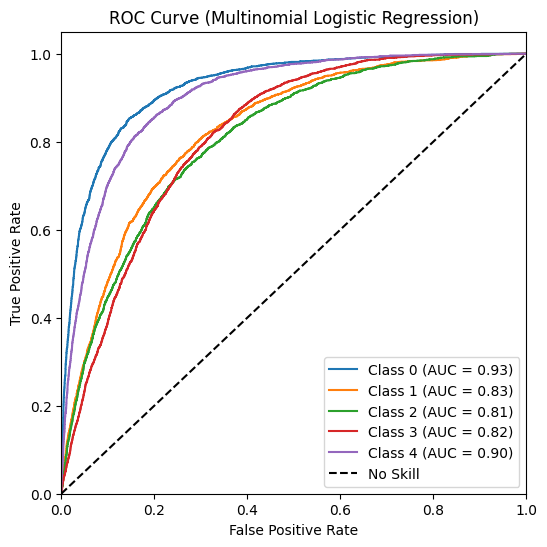

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


# Create a multinomial logistic regression classifier
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict class labels for test data
y_pred_test = classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(Y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate Confusion Matrix
confusion_matrix_result = confusion_matrix(Y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_matrix_result)

# ROC Curve and AUC Score
# One-vs-Rest approach for ROC curve (as Multinomial Logistic Regression doesn't directly output probabilities)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classifier.classes_)

for i in range(n_classes):
    y_test_binary = (Y_test == i)  # Binarize for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multinomial Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

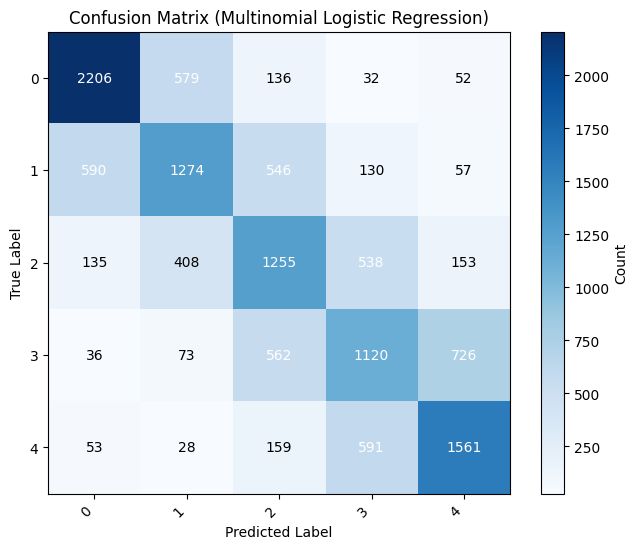

In [62]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_result, cmap='Blues')
plt.colorbar(label='Count')

# Set labels for axes
class_names = [str(x) for x in range(len(classifier.classes_))]  # Adapt based on your class names
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.yticks(range(len(class_names)), class_names)

# Add text for each cell (optional)
for i in range(len(confusion_matrix_result)):
    for j in range(len(confusion_matrix_result[0])):
        plt.text(j, i, confusion_matrix_result[i, j], ha='center', va='center', color='white' if confusion_matrix_result[i, j] > np.mean(confusion_matrix_result) else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Multinomial Logistic Regression)')
plt.show()

good results.